
## Assignment #3: Regression Activity
### This is sample solution (Other variations are possible)
### Within this notebook, following tasks were accomplished: 
1. Imported the diabetes data set.

2. Analyzed the diabetes data set:  
    - Shape of frame: (442, 11)
    - Shape of data: (442, 10)
    - Shape of target: (442,)
    - Range of target value: (25 <= Target_value <= 346)
    - Range of feature value: (-0.2 <= Feature_value  <= 0.2)
    - No missing feature or target values found throughout the dataset
    - (See the section for the statistics)
 
3. Scatter matrix and correlation matrix were created to determine if any features strongly correlate. Most strongly correlated features to the target are:  
    - bmi: 0.586450  
    - s5: 0.565883  
    - bp: 0.441484
    
4. Split the diabetes dataset in to trainning set and test set via StratifiedShuffleSplit
    - Used StratifiedShuffleSplit to split the dataset so that both train set and test set will have the distribution of classes that reflects the original data set.
    
5. Developed and trained models:
    - Linear Regression
    - Polynomial Regression (degree = 2, 3, 5)
    - Linear Regression with regularization impletented (Ridge, Lasso, and Elastic Net)
    
6. Demonstrated performance of various models via learning curve:
    - Polynomial regression performed worse than linear regression due to overfitting. As we increase the degree of polynomial, the the RMSE for training set went down, but that for validation set went up. This indicates overfitted model. 
    - Performance were measured for Linear and polynomial regressions with Ridge, Lasso, and Elastic Net. All models performed slightly better for alpha=0.01 than that for alpha = 0.1 and alpha = 1.
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
df = load_diabetes(as_frame = True)

### Check the structure of the loaded data

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
df.data.shape

(442, 10)

In [5]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
df.frame[:10]

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
5 -0.076395 -0.041176 -0.096346    97.0  
6 -0.039493 -0.062917 -0.038357   138.0  
7  0.017703 -0.035816  0.003064    63.0  
8 -0.002592 -0.014960  0.011349   110.0  
9 -0.002592  0.067737 -0.013504   310.0

In [7]:
df.target[:10]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
5     97.0
6    138.0
7     63.0
8    110.0
9    310.0
Name: target, dtype: float64

In [8]:
df.frame.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

(No non-null values found)

In [9]:
df.frame.shape

(442, 11)

In [10]:
df.data.shape

(442, 10)

In [11]:
df.target.shape

(442,)

In [12]:
df.frame.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [13]:
df.frame.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

(min, max, mean of each features and target are listed above)

### Try to identify correlation

In [14]:
corr_matrix = df.frame.corr()

In [15]:
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

#### Features strongly correlated with the target (in order):
- bmi: 0.586450  
- s5: 0.565883  
- bp: 0.441484

array([[<AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='sex', ylabel='age'>,
        <AxesSubplot: xlabel='bmi', ylabel='age'>,
        <AxesSubplot: xlabel='bp', ylabel='age'>,
        <AxesSubplot: xlabel='s1', ylabel='age'>,
        <AxesSubplot: xlabel='s2', ylabel='age'>,
        <AxesSubplot: xlabel='s3', ylabel='age'>,
        <AxesSubplot: xlabel='s4', ylabel='age'>,
        <AxesSubplot: xlabel='s5', ylabel='age'>,
        <AxesSubplot: xlabel='s6', ylabel='age'>,
        <AxesSubplot: xlabel='target', ylabel='age'>],
       [<AxesSubplot: xlabel='age', ylabel='sex'>,
        <AxesSubplot: xlabel='sex', ylabel='sex'>,
        <AxesSubplot: xlabel='bmi', ylabel='sex'>,
        <AxesSubplot: xlabel='bp', ylabel='sex'>,
        <AxesSubplot: xlabel='s1', ylabel='sex'>,
        <AxesSubplot: xlabel='s2', ylabel='sex'>,
        <AxesSubplot: xlabel='s3', ylabel='sex'>,
        <AxesSubplot: xlabel='s4', ylabel='sex'>,
        <AxesSubplot: xlabel='s5', ylab

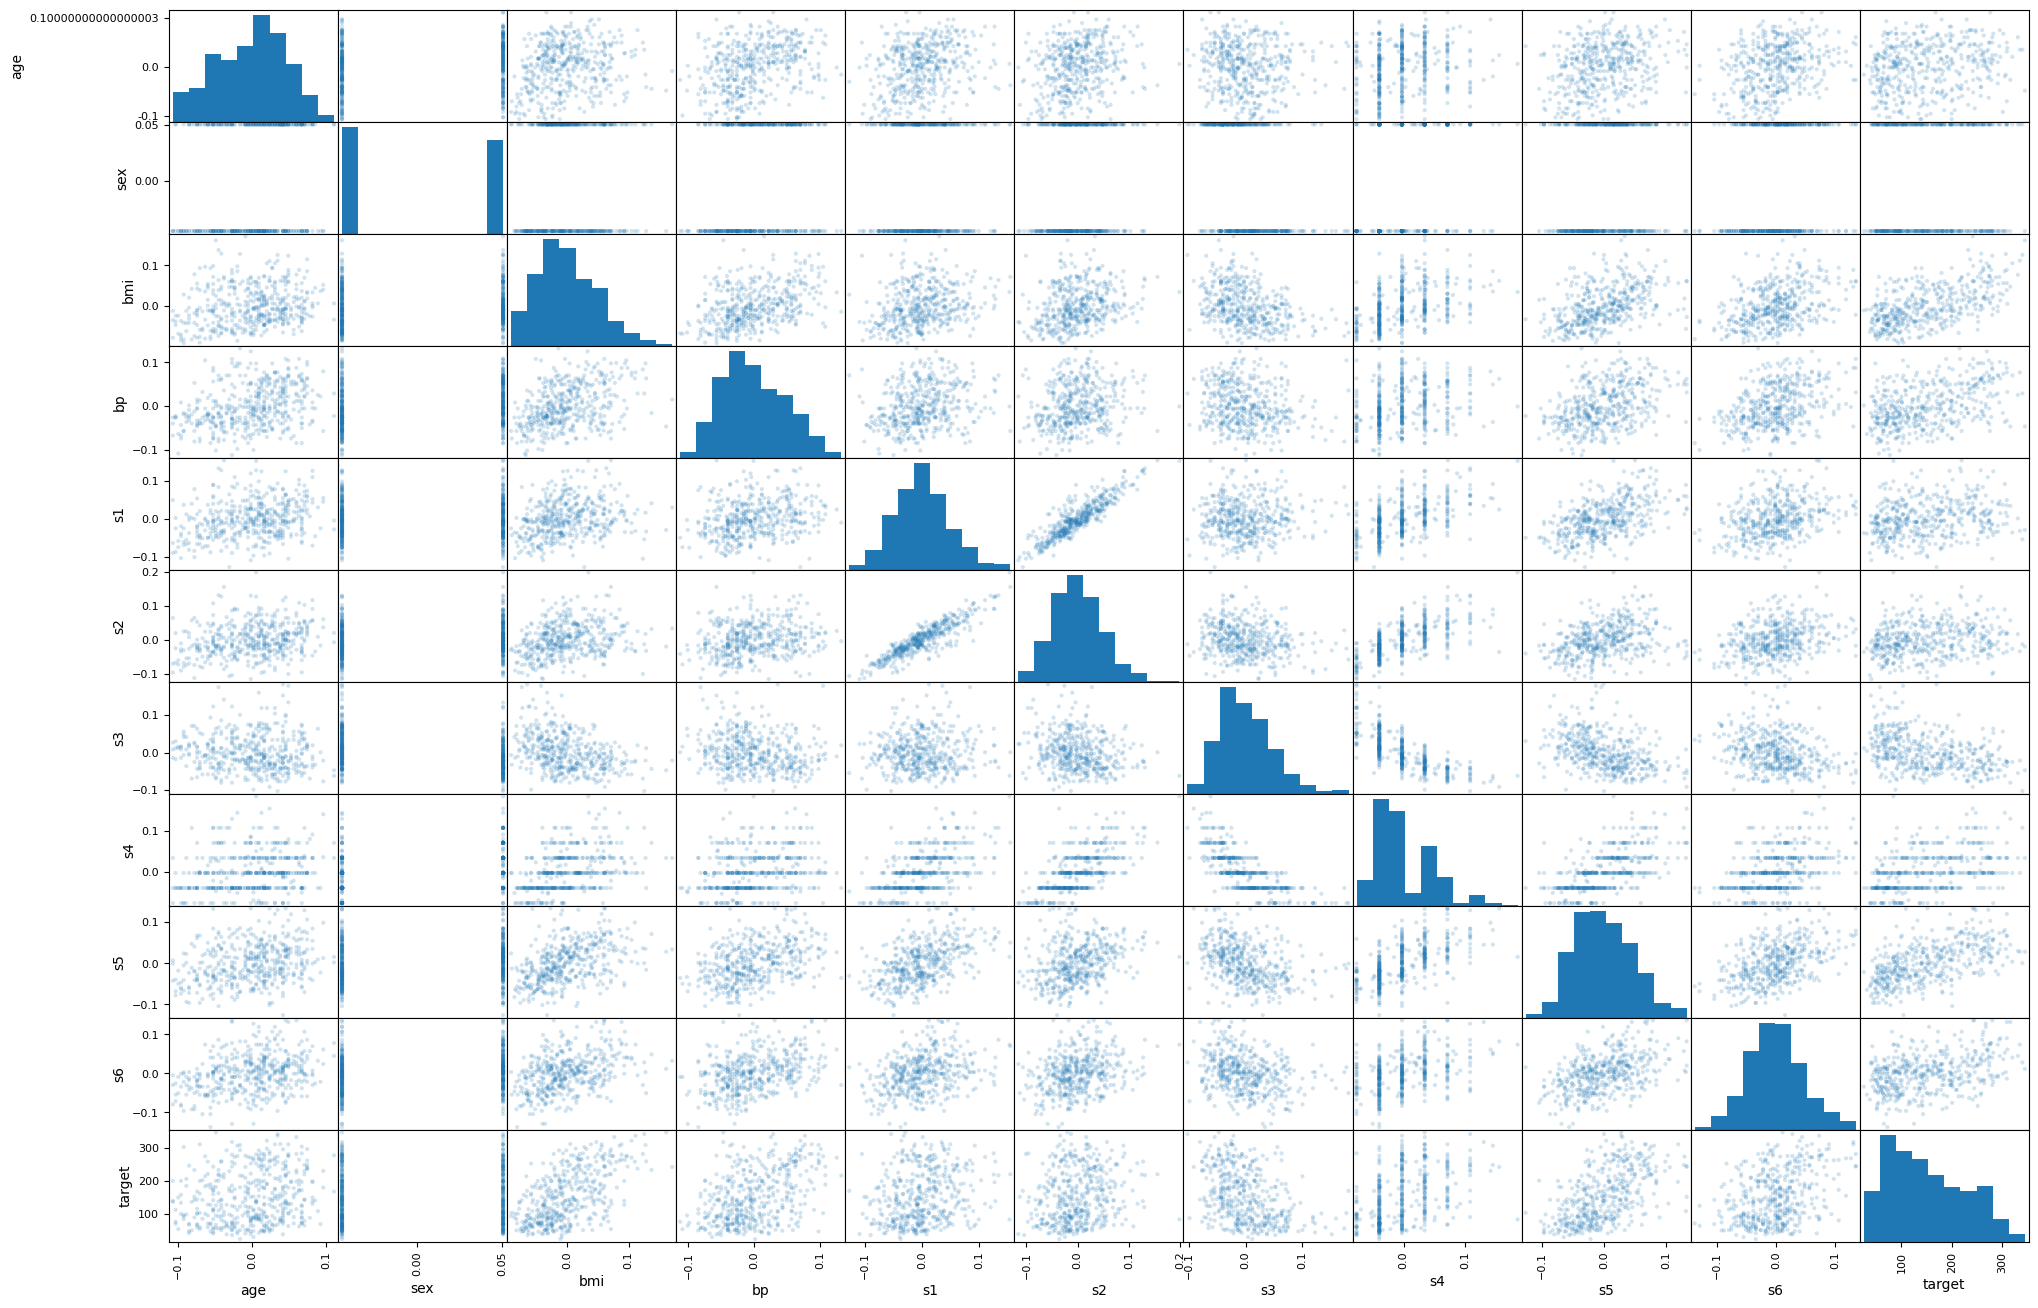

In [16]:
pd.plotting.scatter_matrix(df.frame, figsize=(24, 16), alpha=0.2)

Other strong correlations among features:  
- Between s1 & s2
- Between s4 & s2
- Between s5 & s4

In [17]:
corr_matrix["s1"].sort_values(ascending=False)

s1        1.000000
s2        0.896663
s4        0.542207
s5        0.515503
s6        0.325717
age       0.260061
bmi       0.249777
bp        0.242464
target    0.212022
s3        0.051519
sex       0.035277
Name: s1, dtype: float64

(-0.2, 0.2, -0.2, 0.2)

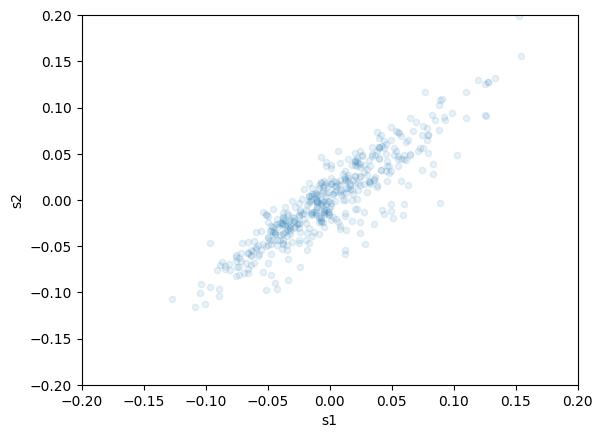

In [18]:
df.frame.plot(kind="scatter", x="s1", y="s2",
             alpha=0.1)
plt.axis([-0.2, 0.2, -0.2, 0.2])

In [19]:
corr_matrix["s4"].sort_values(ascending=False)

s4        1.000000
s2        0.659817
s5        0.617859
s1        0.542207
target    0.430453
s6        0.417212
bmi       0.413807
sex       0.332115
bp        0.257650
age       0.203841
s3       -0.738493
Name: s4, dtype: float64

(-0.2, 0.2, -0.2, 0.2)

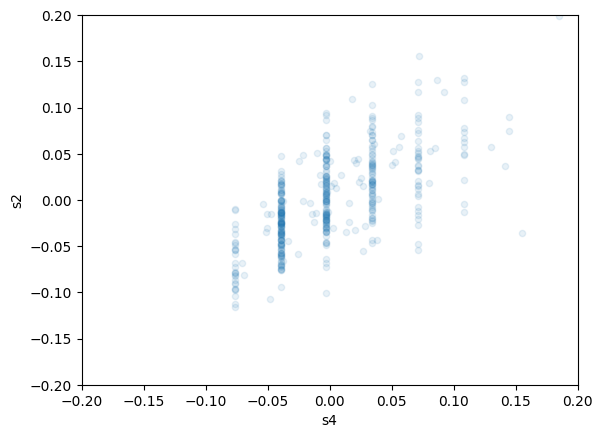

In [20]:
df.frame.plot(kind="scatter", x="s4", y="s2", alpha=0.1)
plt.axis([-0.2, 0.2, -0.2, 0.2])

In [21]:
corr_matrix["s5"].sort_values(ascending=False)

s5        1.000000
s4        0.617859
target    0.565883
s1        0.515503
s6        0.464669
bmi       0.446157
bp        0.393480
s2        0.318357
age       0.270774
sex       0.149916
s3       -0.398577
Name: s5, dtype: float64

(-0.2, 0.2, -0.2, 0.2)

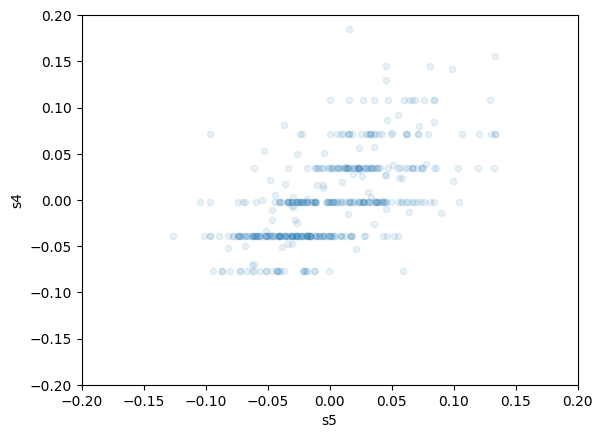

In [22]:
df.frame.plot(kind="scatter", x="s5", y="s4", alpha=0.1)
plt.axis([-0.2, 0.2, -0.2, 0.2])

## Preprocessing  
- Feature scaling is not need as the dataset has been already mean-centred and scaled by the standard deviation times number of samples.

## REFERENCE - Checking various regression models
## (This section is not needed as a part of assignment. Left as a reference purpose only)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3)

In [25]:
X_train.shape

(309, 10)

In [26]:
X_test.shape

(133, 10)

In [27]:
y_train.shape

(309,)

In [28]:
y_test.shape

(133,)

In [29]:
# Liner Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(150.26897718479327,
 array([ -47.16187765, -263.62736004,  533.33987463,  345.35191154,
        -832.48054898,  623.99209512,   69.60473361,   77.56829678,
         756.04935244,   93.49146081]))

In [30]:
# Polynomial Regression (degree=1) same as Linear Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features_d1 = PolynomialFeatures(degree=1, include_bias=False)
X_poly_d1 = poly_features_d1.fit_transform(X_train)

In [31]:
X_poly_d1

array([[ 0.00175052, -0.04464164, -0.06548562, ..., -0.03949338,
        -0.00330084,  0.00720652],
       [-0.02367725, -0.04464164, -0.046085  , ..., -0.00259226,
        -0.03324559,  0.01134862],
       [ 0.01628068, -0.04464164, -0.02884001, ..., -0.03949338,
        -0.03074792, -0.04249877],
       ...,
       [-0.10359309, -0.04464164, -0.0374625 , ..., -0.00259226,
        -0.06833155, -0.02593034],
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090325, -0.0010777 ],
       [ 0.07076875,  0.05068012, -0.03099563, ..., -0.03949338,
        -0.01495969, -0.0010777 ]])

In [32]:
X_poly_d1.shape

(309, 10)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_d1, y_train)
lin_reg.intercept_, lin_reg.coef_

(150.26897718479324,
 array([ -47.16187765, -263.62736004,  533.33987463,  345.35191154,
        -832.48054898,  623.99209512,   69.60473361,   77.56829678,
         756.04935244,   93.49146081]))

In [34]:
# Polynomial Regression (degree=2)
from sklearn.preprocessing import PolynomialFeatures
poly_features_d2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_d2 = poly_features_d2.fit_transform(X_train)

In [35]:
X_poly_d2

array([[ 1.75052192e-03, -4.46416365e-02, -6.54856182e-02, ...,
         1.08955320e-05, -2.37875435e-05,  5.19338776e-05],
       [-2.36772472e-02, -4.46416365e-02, -4.60850009e-02, ...,
         1.10526943e-03, -3.77291705e-04,  1.28791250e-04],
       [ 1.62806757e-02, -4.46416365e-02, -2.88400077e-02, ...,
         9.45434433e-04,  1.30674857e-03,  1.80614517e-03],
       ...,
       [-1.03593093e-01, -4.46416365e-02, -3.74625043e-02, ...,
         4.66920033e-03,  1.77186018e-03,  6.72382480e-04],
       [ 3.08108295e-02, -4.46416365e-02, -2.02175111e-02, ...,
         1.18880875e-04,  1.17504060e-05,  1.16143190e-06],
       [ 7.07687525e-02,  5.06801187e-02, -3.09956318e-02, ...,
         2.23792439e-04,  1.61220246e-05,  1.16143190e-06]])

In [36]:
X_poly_d2.shape

(309, 65)

In [37]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly_d2, y_train)
lin_reg.intercept_, lin_reg.coef_

(248.55045432252015,
 array([-1.26239207e+01, -2.92579817e+02,  4.87701174e+02,  3.59985003e+02,
         2.58647910e+04, -2.27192597e+04, -1.00694301e+04, -1.35833670e+02,
        -7.85157044e+03,  1.35359747e+02,  1.70519579e+03,  3.07357875e+03,
        -1.35012240e+03, -1.56404218e+03,  8.85774081e+03, -9.36734236e+03,
        -2.28487324e+03, -5.36864630e+02, -8.11567169e+02,  2.82823797e+03,
        -1.76673797e+00,  3.10097908e+03,  1.88832977e+02,  1.34467506e+04,
        -1.12342874e+04, -6.63227014e+03, -4.80457771e+03, -3.72765754e+03,
         2.62362477e+03,  1.25809768e+03,  1.33034846e+03, -4.48043955e+03,
         4.05578848e+03,  6.22448169e+02, -4.22787507e+03,  2.28381776e+03,
         3.20081100e+03,  6.29339128e+02,  1.44821465e+04, -1.04857824e+04,
        -4.16816687e+03,  2.23331601e+03, -6.08462539e+03, -3.65473381e+03,
         1.97499503e+05, -3.03430668e+05, -1.66221767e+05, -3.13588757e+04,
        -2.66636966e+05, -2.30394391e+04,  1.18002370e+05,  1.25614

In [38]:
# Ridge: SGDRegressor(penalty="l2")
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=10000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train, y_train)
sgd_reg.predict(X_test[:10])

array([186.17297791, 196.8548042 , 171.04866502, 138.25647882,
       118.11056652,  88.31958887, 262.08770883,  75.40315651,
        91.81611011, 173.80625262])

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = model = Ridge(alpha=0.01, solver="cholesky")
ridge_reg.fit(X_train, y_train)
ridge_reg.predict(X_test[:10])

array([193.292513  , 195.795369  , 174.0151514 , 132.70835877,
       121.20035756,  84.53498655, 257.17235842,  64.75389186,
        93.78083323, 175.48052041])

In [40]:
# Lasso: Lasso(alpha=0.1)
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.predict(X_test[:10])

array([184.20177216, 193.80147468, 172.45637938, 141.58860353,
       113.10166175,  84.68183843, 257.65039871,  70.30149505,
        96.71065948, 171.38548179])

In [41]:
# ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net_reg.fit(X_train, y_train)
elastic_net_reg.predict(X_test[:10])

array([151.95598628, 157.31295973, 150.04641788, 151.45831093,
       144.29289316, 140.6681316 , 163.40406154, 139.77218179,
       139.18390871, 152.72173423])

## (End of REFERENCE)

## Learning Implementation

In [42]:
# Learning Curve implementation from Hands-on Machine Learning
# (https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

## Plotting learning curves for each model


#### Linear Regression

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

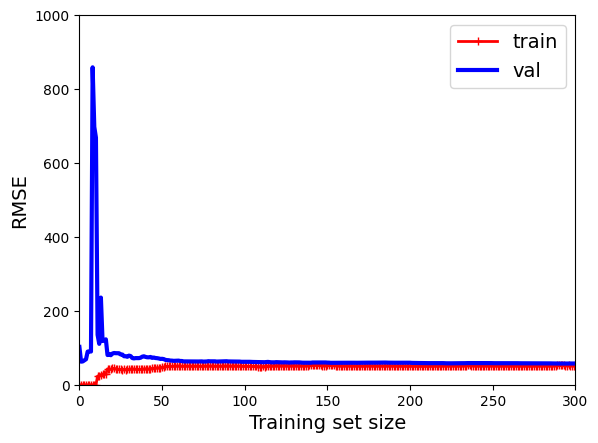

In [43]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, df.data, df.target)
plt.axis([0, 300, 0, 1000])                       
plt.show()                                      

#### Polynomial Regression: Checking degree = 1 to see if we get the same result with Linear Regression

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

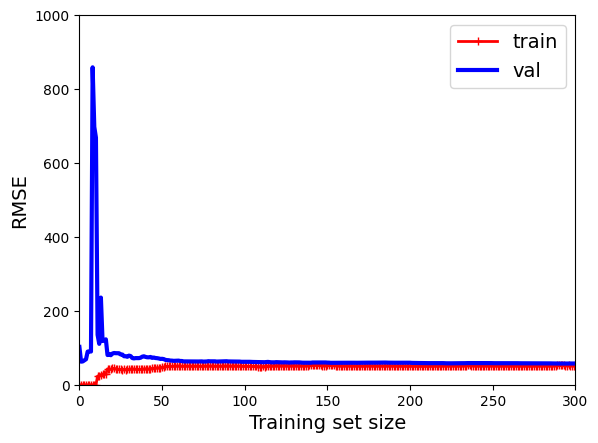

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, df.data, df.target)
plt.axis([0, 300, 0,1000])
plt.show()      

#### Polynimial Regression (degree = 2)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

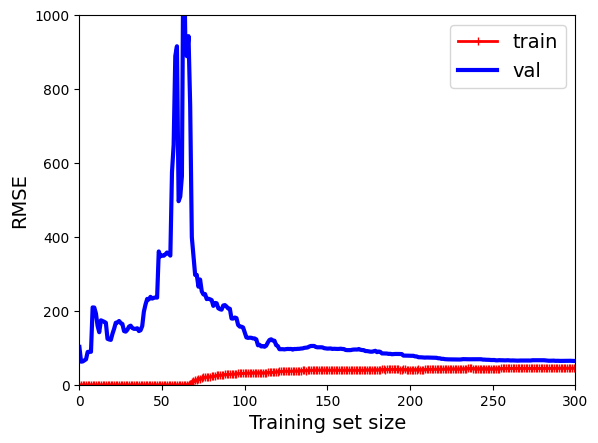

In [45]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, df.data, df.target)
plt.axis([0, 300, 0,1000])
plt.show()      

#### Polynimial Regression (degree = 3)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

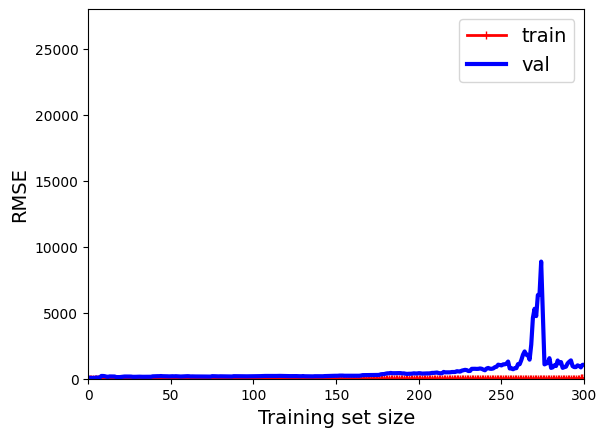

In [46]:
# Degree = 3
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, df.data, df.target)
plt.axis([0, 300, 0,28000])
plt.show()                   

(With degree =3, RMSE for validation set kept increasing as training set size increases.)

#### Polynimial Regression (degree = 5)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

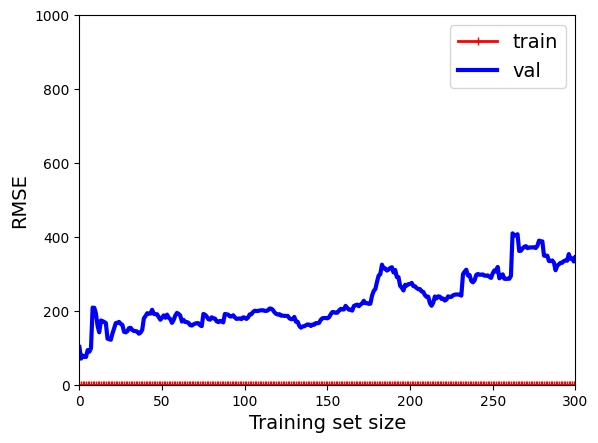

In [47]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, df.data, df.target)
plt.axis([0, 300, 0,1000])
plt.show()                         

##### (With degree = 5, RMSE for validation set kept increasing as training set size increases.)

#### Linear Regression with Ridge (alpha=0.01, 0.1, and 1)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

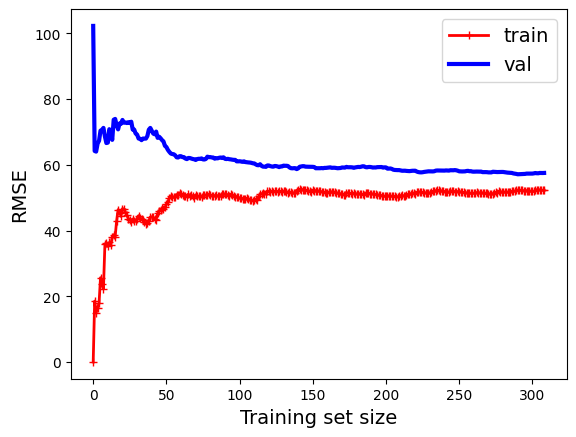

In [48]:
model = Ridge(alpha=0.01, solver="cholesky")

plot_learning_curves(model, df.data, df.target)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

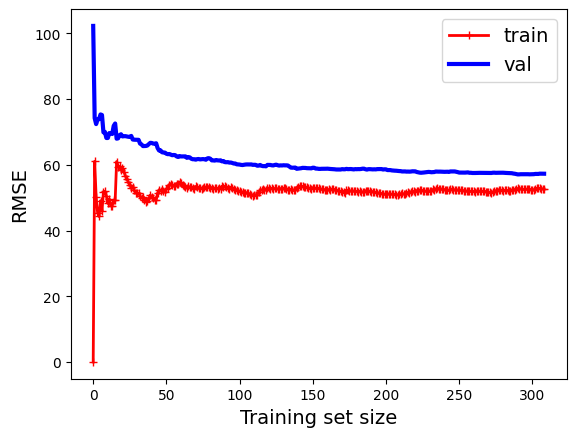

In [49]:
model = Ridge(alpha=0.1, solver="cholesky")

plot_learning_curves(model, df.data, df.target)

(For Ridge, alpha=0.01 slightly performed the best out out alpha=0.01, 0.1, and 1) 

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

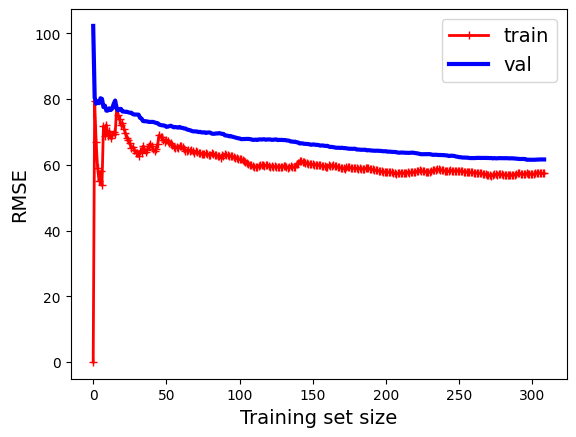

In [50]:
model = Ridge(alpha=1, solver="cholesky")

plot_learning_curves(model, df.data, df.target)

#### Linear Regression with Lasso (alpha=0.1)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

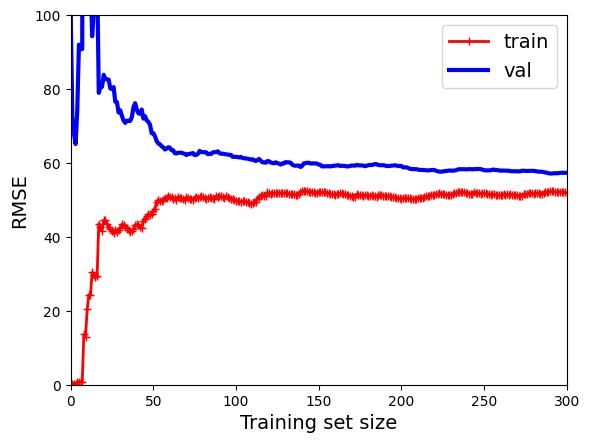

In [51]:
model = Lasso(alpha=0.01, max_iter=10000, tol=0.00001)

plot_learning_curves(model, df.data, df.target)
plt.axis([0, 300, 0,100])
plt.show()   

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

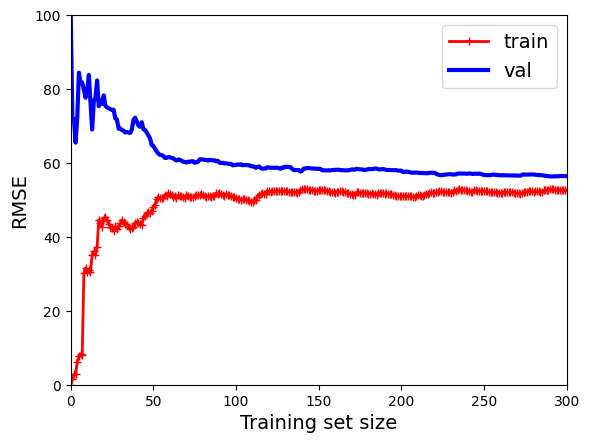

In [52]:
model = Lasso(alpha=0.1)

plot_learning_curves(model, df.data, df.target)
plt.axis([0, 300, 0,100])
plt.show() 

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

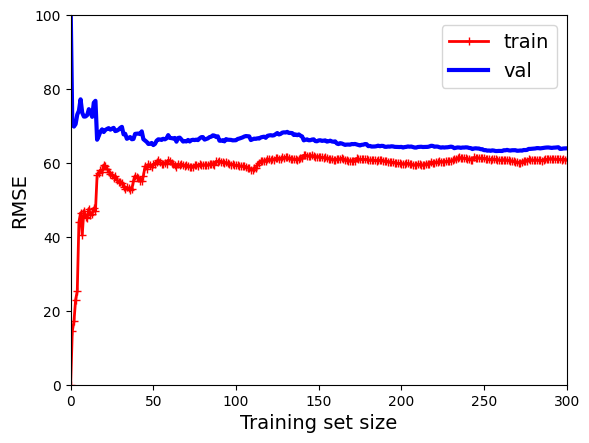

In [53]:
model = Lasso(alpha=1)

plot_learning_curves(model, df.data, df.target)
plt.axis([0, 300, 0,100])
plt.show() 

(For Lasso, alpha=0.01 slightly performed the best out out alpha=0.01, 0.1, and 1) 

#### Linear Regression with ElasticNet (alpha=0.1, l1_ratio=0.5)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

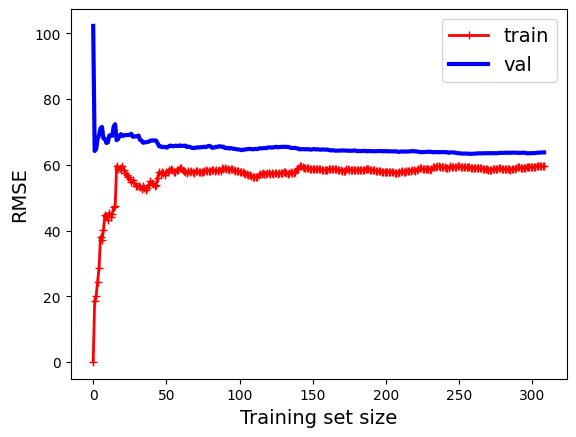

In [54]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)

plot_learning_curves(model, df.data, df.target)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

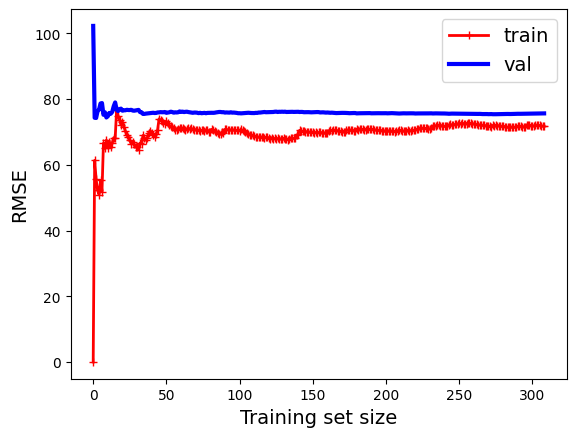

In [55]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

plot_learning_curves(model, df.data, df.target)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

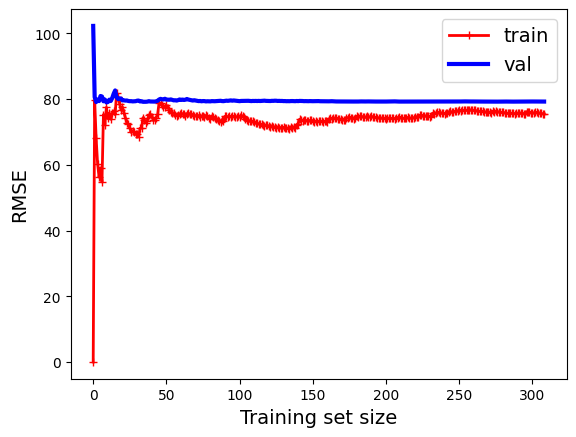

In [56]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)

plot_learning_curves(model, df.data, df.target)

(For Elastic Net, alpha=0.01 slightly performed the best out out alpha=0.01, 0.1, and 1) 

#### Polynomial (degree = 2) with Ridge (alpha=0.01, 0.1, and 1)

### Regularizations

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

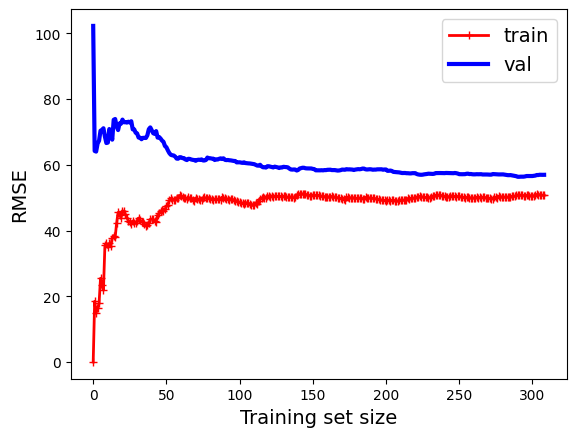

In [57]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Ridged", Ridge(alpha=0.01, solver="cholesky")),
        ])

plot_learning_curves(model, df.data, df.target)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

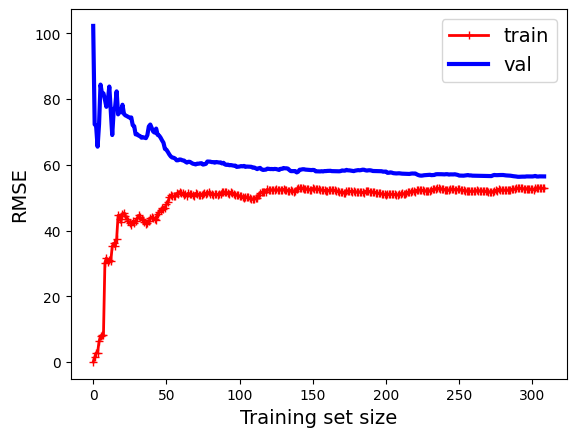

In [58]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Lasso", Lasso(alpha=0.1)),
        ])

plot_learning_curves(model, df.data, df.target)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

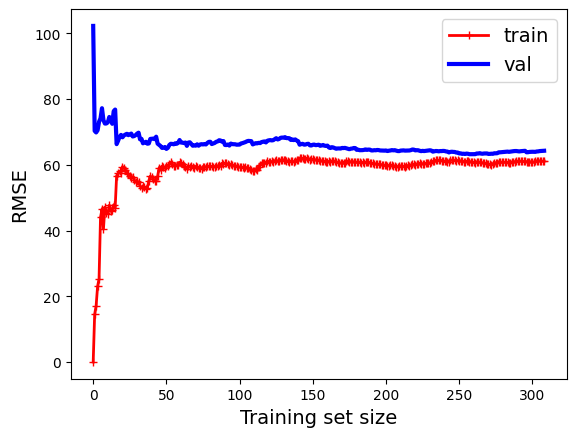

In [59]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Lasso", Lasso(alpha=1)),
        ])

plot_learning_curves(model, df.data, df.target)

(For Polynomial(d=2) Ridge, alpha=0.01 slightly performed the best out out alpha=0.01, 0.1, and 1) 

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

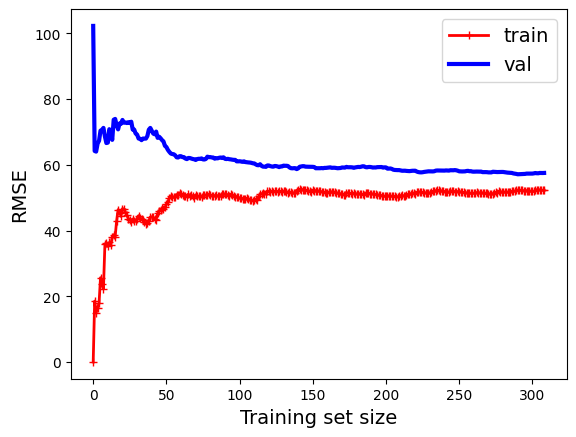

In [60]:
# Linear Regression with Ridge (alpha=0.01)
model = Ridge(alpha=0.01, solver="cholesky")

plot_learning_curves(model, df.data, df.target)

#### Polynomial (degree = 2) with Lasso (alpha=0.01, 0.1, and 1)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.

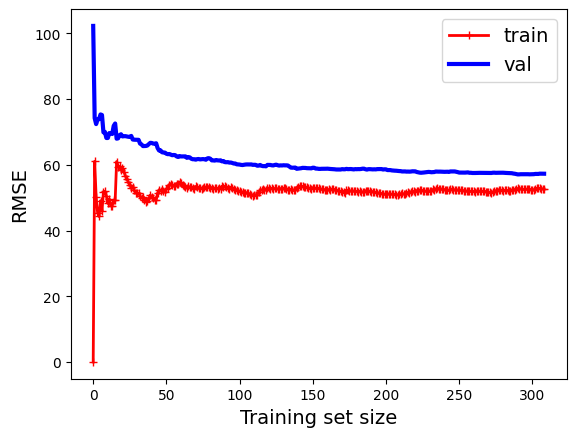

In [61]:
# Linear Regression with Ridge (alpha=0.1)
model = Ridge(alpha=0.1, solver="cholesky")

plot_learning_curves(model, df.data, df.target)

In [62]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Lasso", Lasso(alpha=0.01)),
        ])

plot_learning_curves(model, df.data, df.target)

/tmp/ipykernel_5733/849404360.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
/home/singularity/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5733/849404360.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavi

KeyboardInterrupt: 

/Users/kenjiyoshigoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


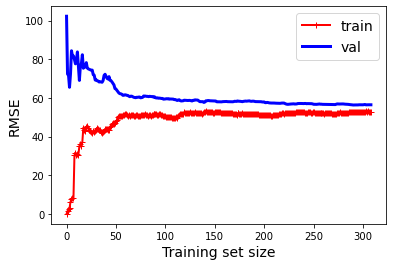

In [ ]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Lasso", Lasso(alpha=0.1)),
        ])

plot_learning_curves(model, df.data, df.target)

/Users/kenjiyoshigoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


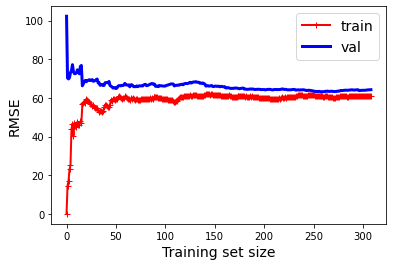

In [ ]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Lasso", Lasso(alpha=1)),
        ])

plot_learning_curves(model, df.data, df.target)

(For Polynomial(d=2) Lasso, alpha=0.01 slightly performed the best out out alpha=0.01, 0.1, and 1) 

/Users/kenjiyoshigoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


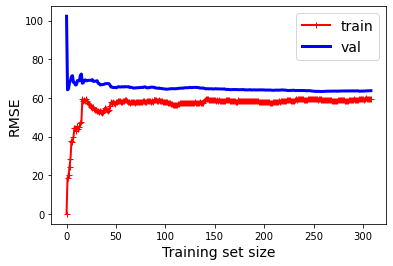

In [ ]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Elastic_Net", ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)),
        ])

plot_learning_curves(model, df.data, df.target)

/Users/kenjiyoshigoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


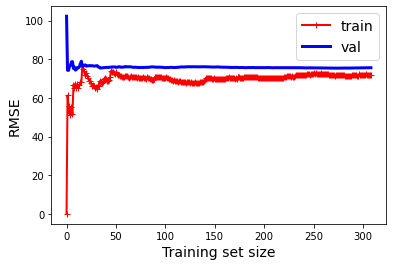

In [ ]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Elastic_Net", ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)),
        ])

plot_learning_curves(model, df.data, df.target)

/Users/kenjiyoshigoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


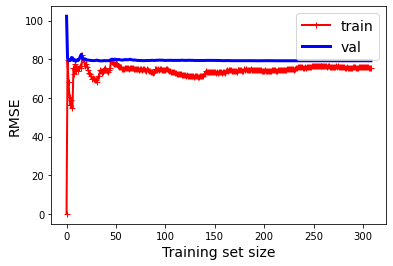

In [ ]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Elastic_Net", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)),
        ])

plot_learning_curves(model, df.data, df.target)

(For Polynomial(d=2) Elastic Net, alpha=0.01 slightly performed well over alpha=0.1, and 1) 

 #### Linear Regression with Ridge (SGDRegressor(penalty="l2")) (alpha=0.1)
 #### (Does not converge)

In [ ]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(penalty="l2", max_iter=10000, tol=1e-3, random_state=42)

plot_learning_curves(model, df.data, df.target)

#### Polynomial (degree = 2) with Ridge (alpha=0.1)

In [ ]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Ridged", Ridge(alpha=0.1, solver="cholesky")),
        ])

plot_learning_curves(model, df.data, df.target)

#### Polynomial (degree = 5) with Ridge (alpha=0.1)

In [ ]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("Ridged", Ridge(alpha=0.1, solver="cholesky")),
        ])

plot_learning_curves(model, df.data, df.target)

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

plot_learning_curves(model, df.data, df.target)

In [ ]:
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Elastic_Net", ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)),
        ])

plot_learning_curves(model, df.data, df.target)

In [ ]:
# Lasso Regression
#model = SGDRegressor(penalty="l2", max_iter=10000, tol=1e-3, random_state=42)

#lasso_reg = Lasso(alpha=0.01, max_iter=1000000, tol=0)

#plot_learning_curves(lasso_reg, df.data, df.target.ravel())


model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("Lasso", Lasso(alpha=0.1))
        ])
# model.fit(X_train,y_train.ravel())
plot_learning_curves(model, df.data, df.target)

In [ ]:
# Lasso Regression
#model = SGDRegressor(penalty="l2", max_iter=10000, tol=1e-3, random_state=42)

#lasso_reg = Lasso(alpha=0.01, max_iter=1000000, tol=0)

#plot_learning_curves(lasso_reg, df.data, df.target.ravel())


model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("Lasso", Lasso(alpha=1))
        ])
# model.fit(X_train,y_train.ravel())
plot_learning_curves(model, df.data, df.target)